# Project 3

I have used ChatGPT and Github Copilot for guidence and faster development

In [1]:
!%pip install networkx matplotlib
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import requests
import zipfile
import tempfile
import os
import numpy as np
import requests
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import random



'%pip' is not recognized as an internal or external command,
operable program or batch file.


Ex1 Draw a histogram with marked sigma intervals for random variables from the normal distrubution.

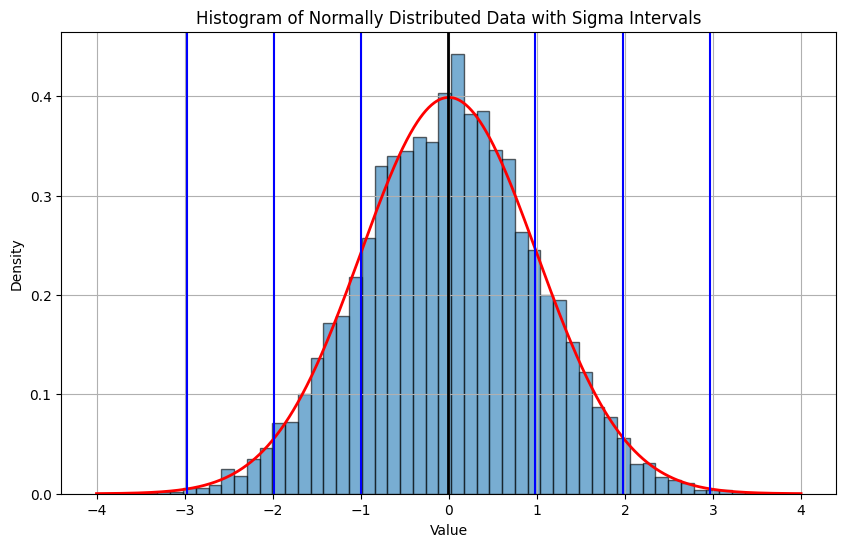

In [2]:
def normal_distribution(x):
    return (1/np.sqrt(2*np.pi)) * np.exp(-0.5 * x**2)

data = np.random.normal(0, 1, 10000)

plt.figure(figsize=(10, 6))
count, bins, ignored = plt.hist(data, bins=50, density=True, alpha=0.6, edgecolor='black')

mean = np.mean(data)
std_dev = np.std(data)

x = np.linspace(-4, 4, 1000)
plt.plot(x, normal_distribution(x), linewidth=2, color='r')

for i in range(1, 4):
    plt.axvline(mean + i * std_dev, color='b', linestyle='-', linewidth=1.5)
    plt.axvline(mean - i * std_dev, color='b', linestyle='-', linewidth=1.5)

plt.axvline(mean, color='k', linestyle='-', linewidth=2)

plt.title('Histogram of Normally Distributed Data with Sigma Intervals')
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True)

plt.show()

Ex2 Check the Pareto rule for variables from the geometric distribution.

In [3]:
n = 10000
data_geom = np.random.geometric(p=0.2, size=n)

sorted_data = np.sort(data_geom)[::-1]

cumulative_sum = np.cumsum(sorted_data)
total_sum = cumulative_sum[-1]

cumulative_percentage = cumulative_sum / total_sum * 100
pareto_threshold = np.argmax(cumulative_percentage >= 80)
pareto_percentage = (pareto_threshold + 1) / n * 100

pareto_percentage, cumulative_percentage[pareto_threshold]
# 40.78% of data are responsible for 80% of the total sum

(np.float64(48.9), np.float64(80.00684559164033))

Ex 3 Draw a histogram with marked sigma intervals for variables drawn from a continuous power distribution.

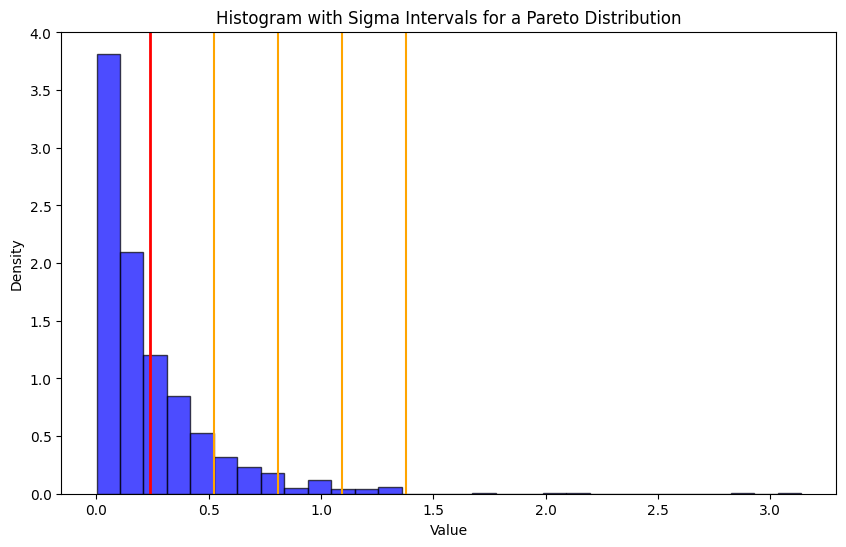

In [4]:
a = 5  # Shape parameter
size = 1000  # Sample size

# Generate data from a power distribution
data = np.random.pareto(a, size)

# Calculate mean and standard deviations
mean = np.mean(data)
std_dev = np.std(data)

plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, alpha=0.7, color='blue', edgecolor='black', density=True)

for i in range(1, 5):
    plt.axvline(mean + i * std_dev, color='orange', linestyle='-', linewidth=1.5)

plt.axvline(mean, color='red', linestyle='-', linewidth=2, label='Mean')

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Histogram with Sigma Intervals for a Pareto Distribution')

plt.show()




Ex 4 Check the Pareto rule for variables from the zeta distribution.

In [5]:
a = 2  # Shape parameter
size = 100000  # Sample size

data = np.random.zipf(a, size)
sorted_data = np.sort(data)[::-1]


cumulative_sum = np.cumsum(sorted_data)
total_sum = cumulative_sum[-1]

cumulative_percentage = cumulative_sum / total_sum * 100
pareto_threshold = np.argmax(cumulative_percentage >= 80)
pareto_percentage = (pareto_threshold + 1) / size * 100

pareto_percentage, cumulative_percentage[pareto_threshold]


(np.float64(4.494), np.float64(80.00030782332993))

Ex 5 Empirical justification:
- generate BA network and ER graphs using built-in functions
- observe the presence of hubs
- draw a vertex degree histogram
- compute estimators of expectation and variance for vertex degrees
- how are the two cases different?

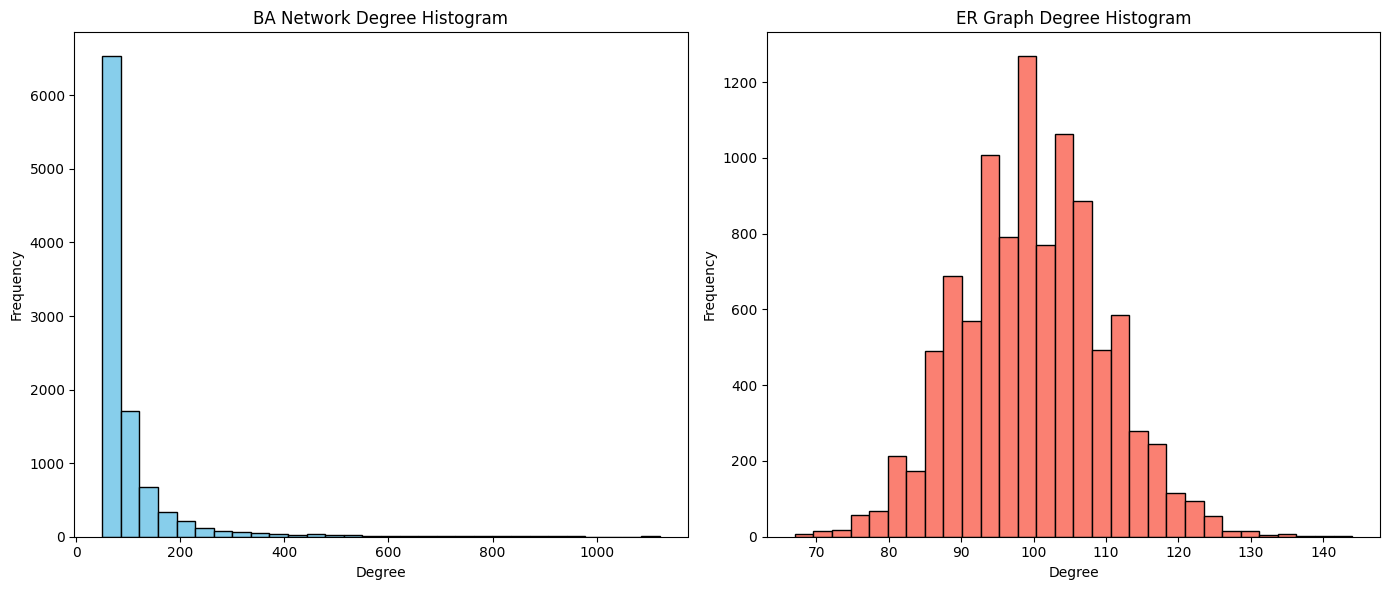

(np.float64(99.5),
 np.float64(8574.1644),
 np.float64(99.8546),
 np.float64(97.33145884000002))

In [6]:
num_nodes = 10000
ba_m = 50
er_p = (2 * ba_m) / num_nodes

ba_graph = nx.barabasi_albert_graph(num_nodes, ba_m)
er_graph = nx.erdos_renyi_graph(num_nodes, er_p)


ba_degrees = [degree for _, degree in ba_graph.degree()]
er_degrees = [degree for _, degree in er_graph.degree()]

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.hist(ba_degrees, bins=30, color='skyblue', edgecolor='black')
plt.title('BA Network Degree Histogram')
plt.xlabel('Degree')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(er_degrees, bins=30, color='salmon', edgecolor='black')
plt.title('ER Graph Degree Histogram')
plt.xlabel('Degree')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

ba_mean, ba_var = np.mean(ba_degrees), np.var(ba_degrees)
er_mean, er_var = np.mean(er_degrees), np.var(er_degrees)

ba_mean, ba_var, er_mean, er_var
# Few hubs in BA
# ER uniform distribution - no hubs

1. Read documentation of the pre-defined graph layout functions in you chosen environment. For the selected real graph, test several visualization methods.


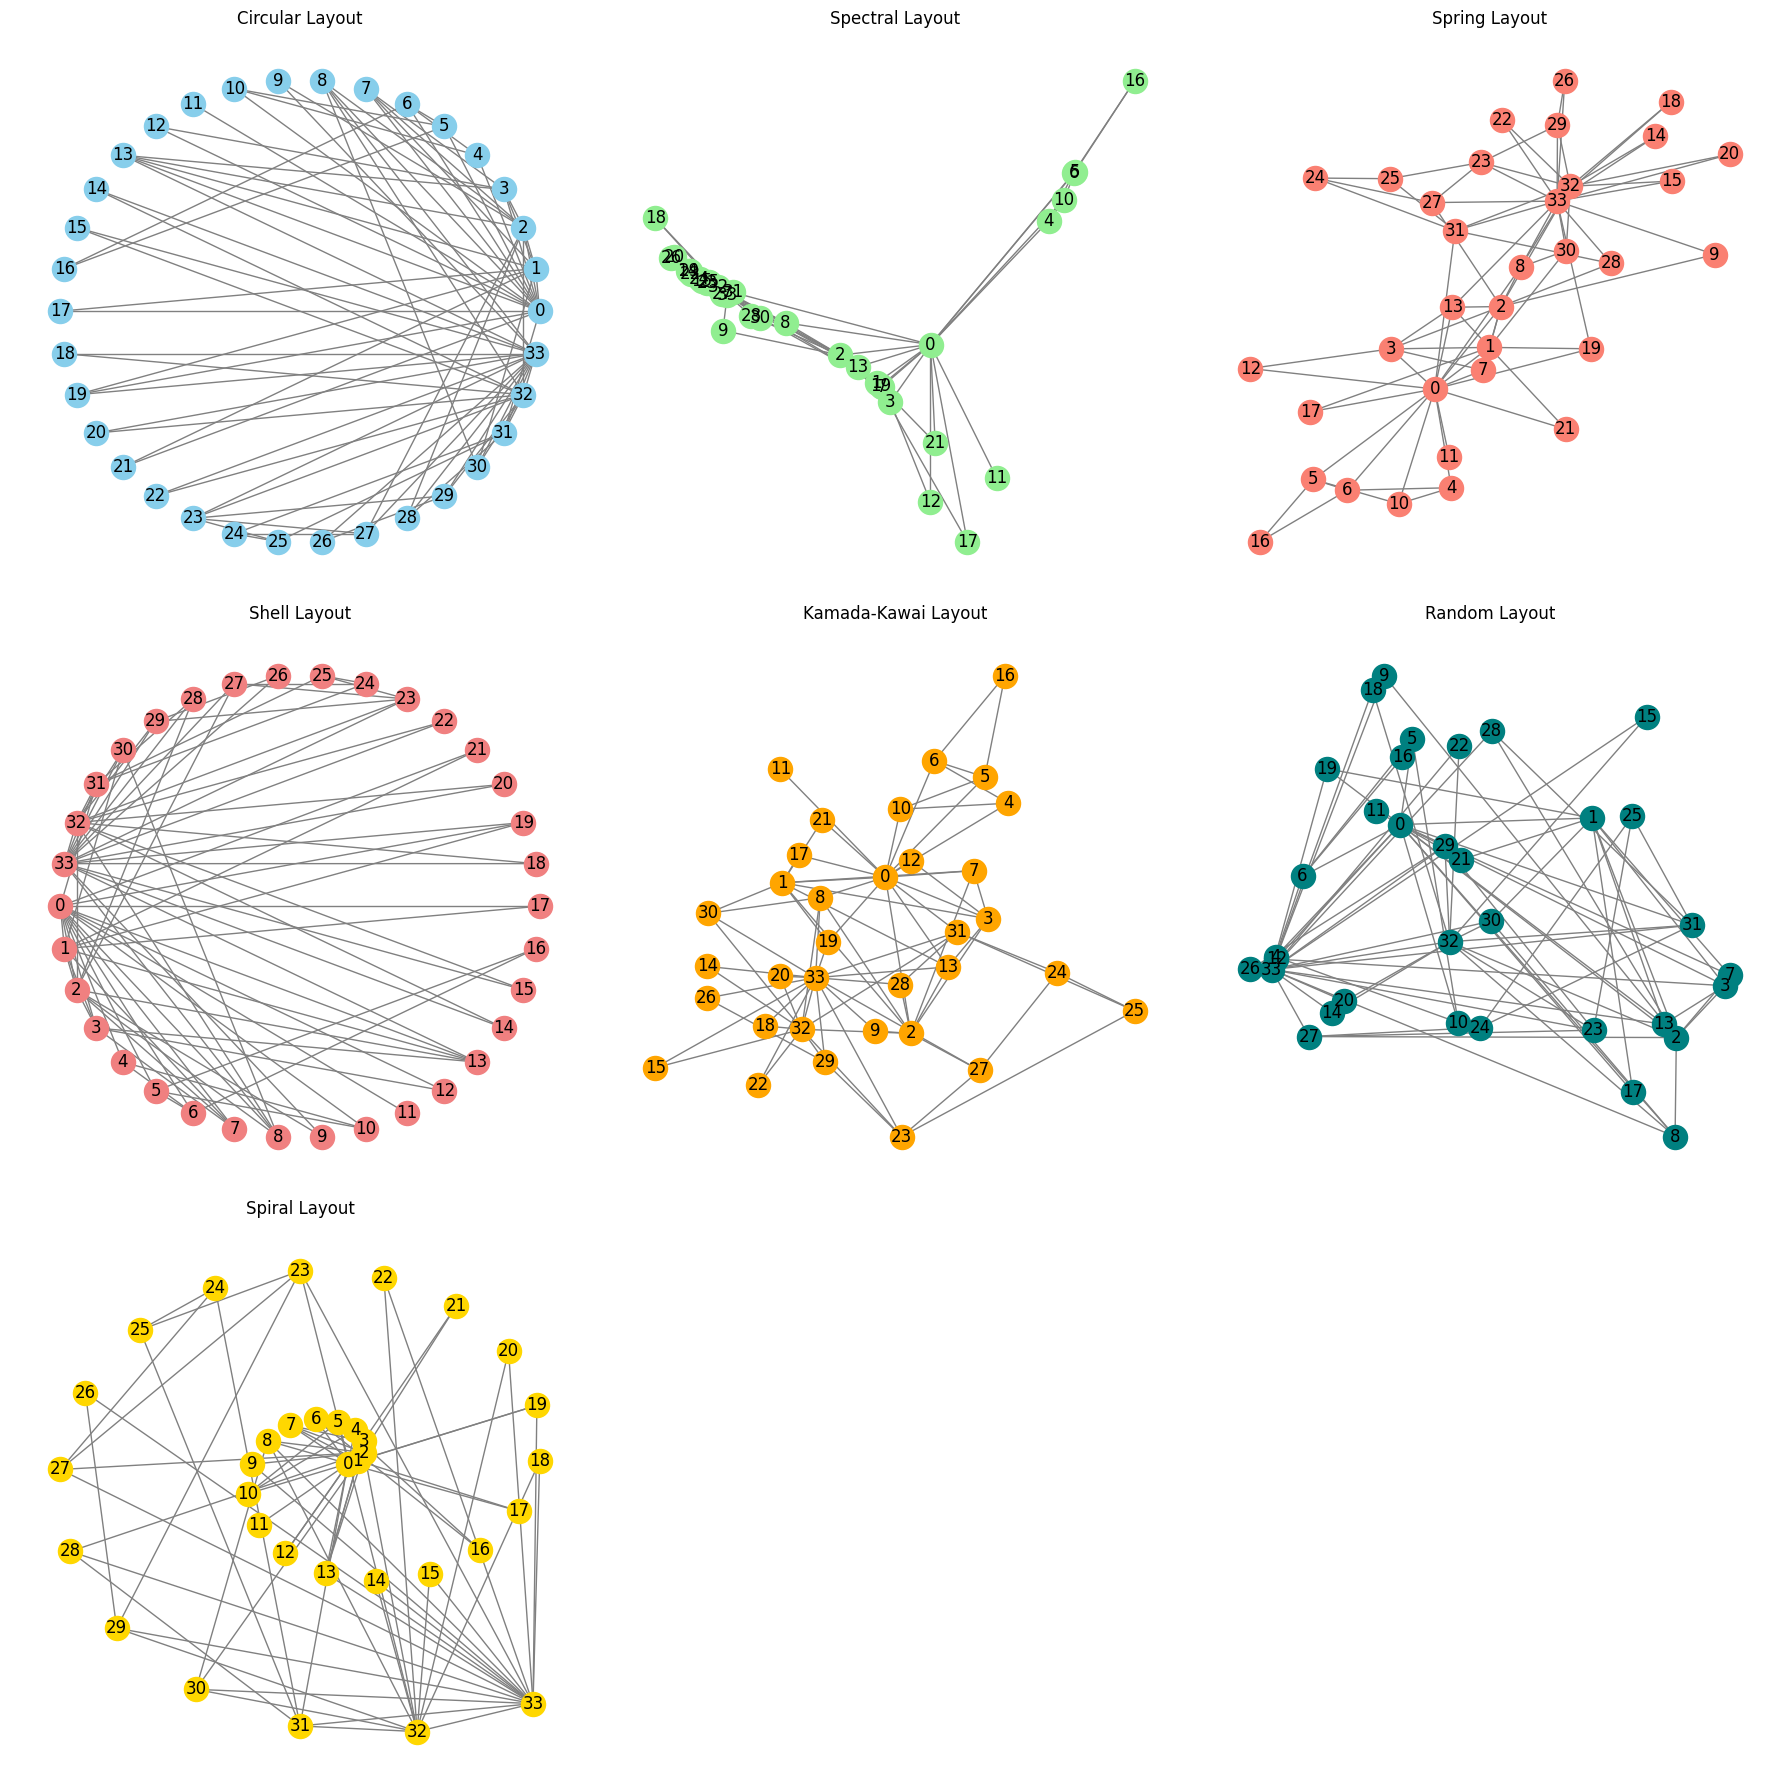

In [7]:
# Asked chatGPT to boost my previous code and improve it with more variety of layouts
G = nx.karate_club_graph()

# Visualize the graph with various layouts
plt.figure(figsize=(18, 18))

# Circular layout
plt.subplot(331)
nx.draw_circular(G, with_labels=True, node_color='skyblue', edge_color='gray')
plt.title("Circular Layout")

# Spectral layout
plt.subplot(332)
nx.draw_spectral(G, with_labels=True, node_color='lightgreen', edge_color='gray')
plt.title("Spectral Layout")

# Spring layout
plt.subplot(333)
nx.draw_spring(G, with_labels=True, node_color='salmon', edge_color='gray')
plt.title("Spring Layout")

# Shell layout
plt.subplot(334)
nx.draw_shell(G, with_labels=True, node_color='lightcoral', edge_color='gray')
plt.title("Shell Layout")

# Kamada-Kawai layout (force-directed)
plt.subplot(335)
nx.draw_kamada_kawai(G, with_labels=True, node_color='orange', edge_color='gray')
plt.title("Kamada-Kawai Layout")


# Random layout
plt.subplot(336)
nx.draw_random(G, with_labels=True, node_color='teal', edge_color='gray')
plt.title("Random Layout")

# Spiral layout
plt.subplot(337)
nx.draw(G, pos=nx.spiral_layout(G), with_labels=True, node_color='gold', edge_color='gray')
plt.title("Spiral Layout")

plt.tight_layout()
plt.show()
